In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [23]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [17]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [18]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [19]:
data_fake["label"] = 0
data_true["label"] = 1

In [20]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [24]:
data_fake_manual_testing = fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i], axis = 0, inplace = True)
    
    
data_true_manual_testing = true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i], axis = 0, inplace = True)
    

In [25]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [26]:
data_fake_manual_testing["label"] = 0
data_true_manual_testing["label"] = 1


C:\Users\chint\AppData\Local\Temp\ipykernel_10748\1248002341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing["label"] = 0
C:\Users\chint\AppData\Local\Temp\ipykernel_10748\1248002341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing["label"] = 1


In [27]:
data_fake_manual_testing.head(10)

,title,text,subject,date,label
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [28]:
data_true_manual_testing.head(10)

,title,text,subject,date,label
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [29]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [30]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [31]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [32]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [33]:
data = data.sample(frac = 1)

In [34]:
data.head()

,text,label
13051,"It is so great to be back in Florida, my secon...",0
15532,George Soros is sticking his nose into voter I...,0
14669,Something about this decision really stinks of...,0
16836,13 Hours debuted in movie theaters today. So...,0
11134,WASHINGTON (Reuters) - In its latest move to c...,1


In [35]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [36]:
data.columns

Index(['text', 'label'], dtype='object')

In [37]:
data.head()

,text,label
0,"It is so great to be back in Florida, my secon...",0
1,George Soros is sticking his nose into voter I...,0
2,Something about this decision really stinks of...,0
3,13 Hours debuted in movie theaters today. So...,0
4,WASHINGTON (Reuters) - In its latest move to c...,1


In [38]:
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'<.*?>+', '', text) 
    text = re.sub(r'\n', ' ', text) 
    text = re.sub(r'\w*\d\w*', '', text)  
    text = re.sub(r'[^\w\s\?!]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text



In [39]:
data['text'] = data['text'].apply(clean_text)

In [40]:
x = data["text"]
y = data["label"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xv_train, y_train)

LogisticRegression()

In [43]:
prediction = lr.predict(xv_test)
lr.score(xv_test, y_test)

0.988680926916221

In [44]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5864
           1       0.99      0.99      0.99      5356

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [45]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [46]:
prediction_dt = DT.predict(xv_test)

In [47]:
DT.score(xv_test, y_test)

0.9966131907308378

In [48]:
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5864
           1       1.00      1.00      1.00      5356

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [49]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [50]:
prediction_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)

0.9959001782531194

In [51]:
print(classification_report(y_test, prediction_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5864
           1       0.99      1.00      1.00      5356

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [52]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [53]:
prediction_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

0.9901069518716578

In [54]:
print(classification_report(y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5864
           1       0.99      0.99      0.99      5356

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [55]:
import joblib

joblib.dump(vectorizer, "vectorizer.jb")
joblib.dump(lr, "lr_model.jb")

['lr_model.jb']

In [57]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_text)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)

    pred_LR = lr.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(
        output_label(pred_LR[0]),
        output_label(pred_DT[0]),
        output_label(pred_GBC[0]),
        output_label(pred_RFC[0])
    ))


In [58]:
news = "This is Disturbing, Donald Trump just couldnt wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn’t do it."
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [59]:
news = "Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban."
manual_testing(news)



LR Prediction: Real News 
DT Prediction: Real News 
GBC Prediction: Fake News 
RFC Prediction: Real News


In [60]:
TOGETHER_API_KEY = "9b858639038a6c894abddb2c3029a270577bf8f2fda01cc00cf798459a26685a"

In [61]:
import requests
import json
def get_explanation(article_text, prediction_label):
    prompt = f"""
Explain why this article is labeled as {prediction_label}:

Article:
\"\"\"{article_text}\"\"\"

Look for signs like clickbait, emotional words, or bias.
"""
    headers = {
        "Authorization": f"Bearer {TOGETHER_API_KEY}", 
        "Content-Type": "application/json"
    }
    data = {
        "model": "mistralai/Mistral-7B-Instruct-v0.1", 
        "prompt": prompt, 
        "max_tokens": 300,  
        "temperature": 0.7,  
        "top_p": 0.9, 
    }
    response = requests.post("https://api.together.xyz/inference", headers=headers, json=data)
    if response.status_code == 200:
        return response.json()['output']['choices'][0]['text']  
    else:
        print("Oops! Something went wrong.")
        print("Error code:", response.status_code)
        print("Details:", response.text)
        return None


In [64]:
article_text = "Virginia officials postpone lottery drawing to decide tied statehouse election"
prediction_label = "FAKE"

explanation = get_explanation(article_text, prediction_label)

print("Explanation:\n")
print(explanation)


Explanation:


This article is labeled as FAKE because it is a clickbait title that does not accurately reflect the content of the article. The title suggests that there is a tied election and that the lottery drawing will be used to decide it, but the actual article does not mention either of these things. Instead, it reports on a technical issue with the lottery system that has caused a delay in the drawing. The title is designed to generate clicks and views, rather than providing accurate information to readers.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

vectorizer = joblib.load("vectorizer.jb")
model = joblib.load("lr_model.jb")


In [4]:
sample_text = ["This is Disturbing, \"Donald Trump just couldn't wish all Americans a Happy New Year and leave it at that..."]

X_sample = vectorizer.transform(sample_text)


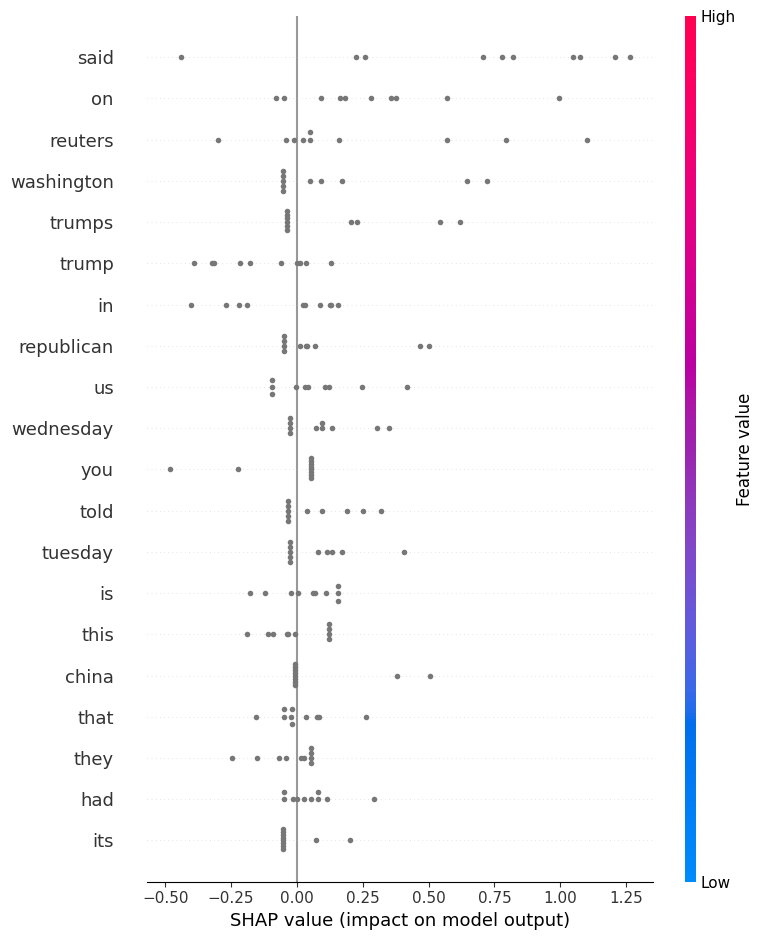

In [ ]:
import shap

explainer = shap.Explainer(lr, xv_train)  

shap_values = explainer(xv_test[:10]) 

shap.summary_plot(shap_values, feature_names=vectorizer.get_feature_names_out())
